# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

#### Не понимаю что брать за Х а что за У. Если брать год - получается ерунда. Построил в зависимости от номера записи в дата сете "Rank" но если размышлять какя может быть зависомость от номера записи и обьема продаж ?! Не понял задание, помогите пожалуйста разобраться. 

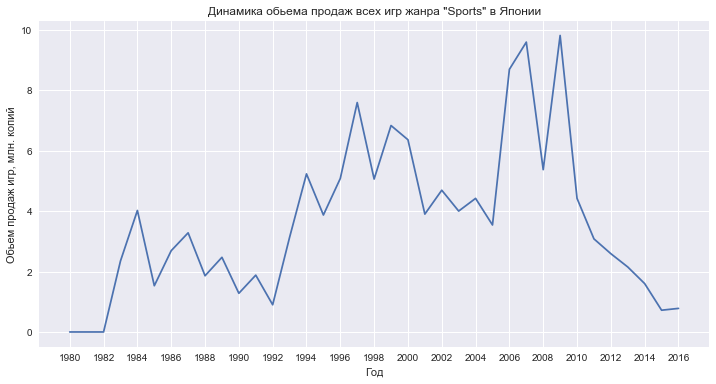

In [95]:
# YOUR CODE HERE ###
plt.style.use('seaborn')

fix, ax = plt.subplots (figsize = (12, 6))

data = df[df['Genre'] == 'Sports'][['Year','JP_Sales']].dropna().sort_values('Year') # Условие + удаляем NaN + сортируем
data['Year'] = data['Year'].apply(int) # Делаем года целочисленными
data = data.groupby('Year').agg('sum') # группируем по годам

ax.plot(data.index, data['JP_Sales'])

ax.set_title('Динамика обьема продаж всех игр жанра "Sports" в Японии')
ax.set_xlabel('Год')
ax.set_ylabel('Обьем продаж игр, млн. копий')
ax.set_xticks(list(range(data.index.min(), data.index.max(), 2)) + [data.index.max()])

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

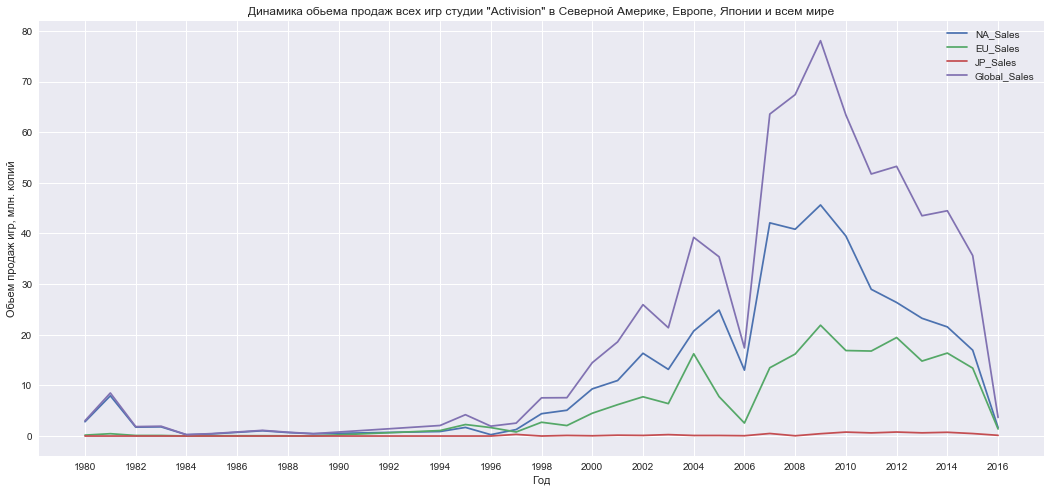

In [94]:
### YOUR CODE HERE ###
plt.style.use('seaborn')

fix, ax = plt.subplots (figsize = (18, 8))

for country in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:
    
    data_Sales = df[df['Publisher'] == 'Activision'][['Year',country]].dropna().sort_values('Year') # Условие + удаляем NaN + сортируем
    data_Sales['Year'] = data_Sales['Year'].apply(int) # Делаем года целочисленными
    data_Sales = data_Sales.groupby('Year').agg('sum') # группируем по годам

    ax.plot(data_Sales.index, data_Sales[country], label = country)

ax.set_title('Динамика обьема продаж всех игр студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Обьем продаж игр, млн. копий')
ax.set_xticks(list(range(data_Sales.index.min(), data_Sales.index.max(), 2)) + [data_Sales.index.max()])
ax.legend()

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

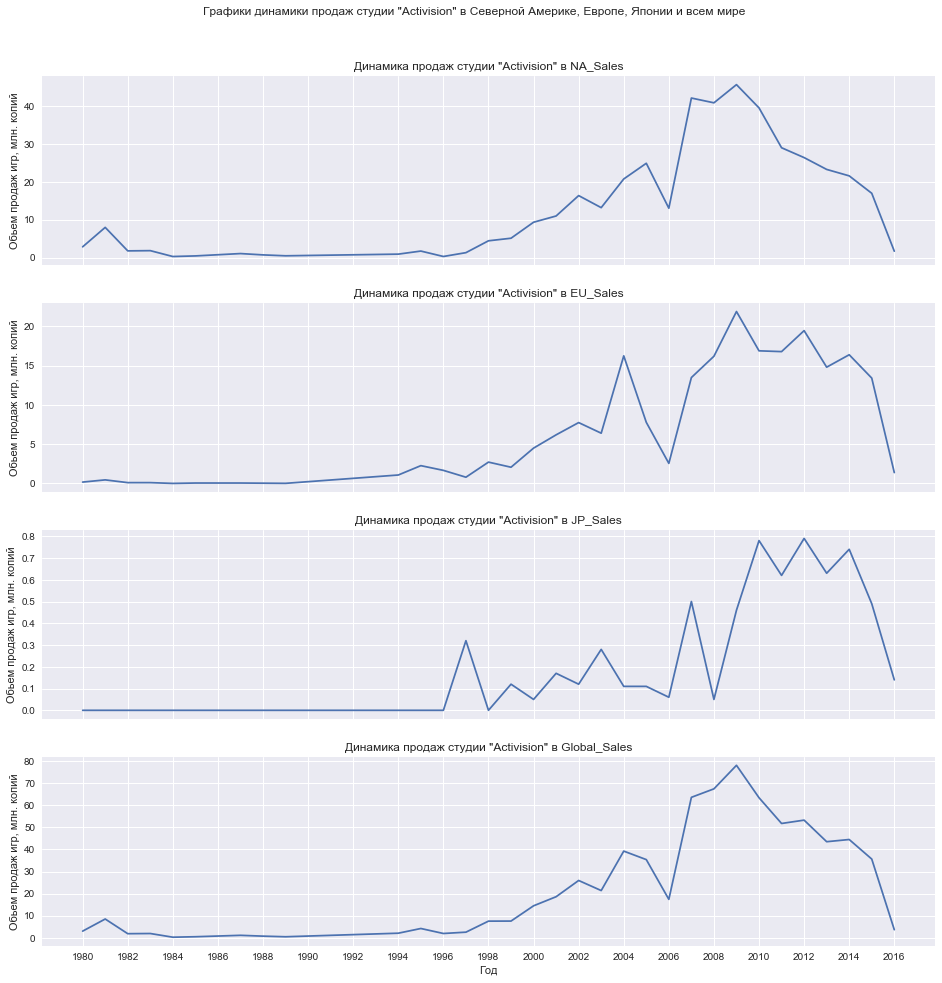

In [93]:
### YOUR CODE HERE ###
plt.style.use('seaborn')

fig, ax = plt.subplots(nrows= 4, ncols= 1,sharex=True, figsize = (16, 16))

data_s = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i, country in enumerate(data_s):
    data_Sales = df[df['Publisher'] == 'Activision'][['Year',country]].dropna().sort_values('Year') # Условие + удаляем NaN + сортируем
    data_Sales['Year'] = data_Sales['Year'].apply(int) # Делаем года целочисленными
    data_Sales = data_Sales.groupby('Year').agg('sum') # группируем по годам
    
    ax[i].plot(data_Sales.index, data_Sales[country])
    
    ax[i].set_title('Динамика продаж студии "Activision" в ' + country)
    ax[i].set_ylabel('Обьем продаж игр, млн. копий')
    ax[i].set_xticks(list(range(data_Sales.index.min(), data_Sales.index.max(), 2)) + [data_Sales.index.max()])
    
    if i == 3:
        ax[i].set_xlabel('Год')

fig.suptitle('Графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире', y = 0.94)
plt.show()
    

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

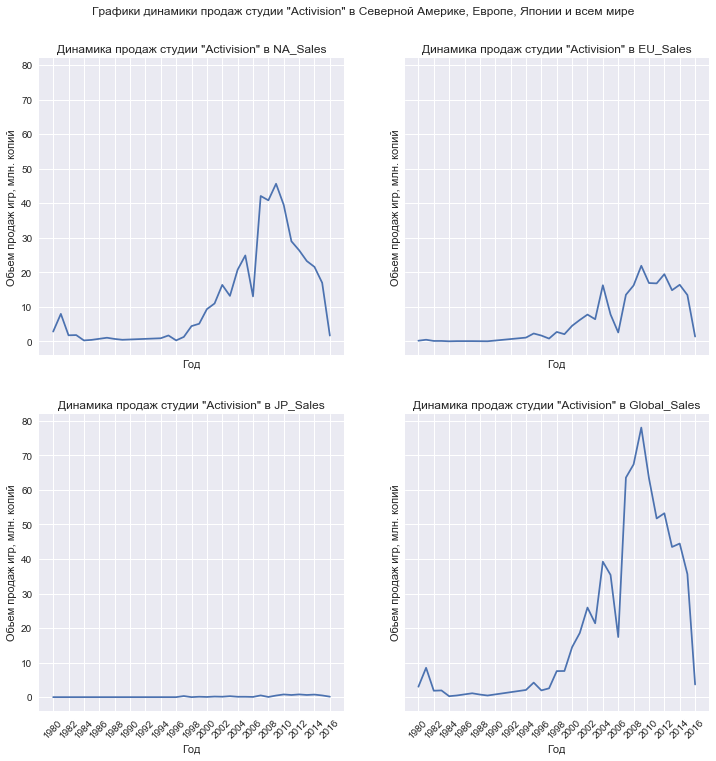

In [92]:
### YOUR CODE HERE ###
plt.style.use('seaborn')

fig, axs = plt.subplots(nrows= 2, ncols= 2,sharex=True,sharey=True, figsize = (12, 12))

data_s = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

row = [0, 1] # для заполнения матрицы 2 Х 2
col = [0, 1]
x = 0 # счетчик для пробежки по массиву с странами

for i in col:
    for j in row:
        country = data_s[x]
        data_Sales = df[df['Publisher'] == 'Activision'][['Year',country]].dropna().sort_values('Year') # Условие + удаляем NaN + сортируем
        data_Sales['Year'] = data_Sales['Year'].apply(int) # Делаем года целочисленными
        data_Sales = data_Sales.groupby('Year').agg('sum') # группируем по годам
            
        ax = axs[i][j]
    
        ax.plot(data_Sales.index, data_Sales[country])
    
        ax.set_title('Динамика продаж студии "Activision" в ' + country)
        ax.set_ylabel('Обьем продаж игр, млн. копий')
        ax.set_xticks(list(range(data_Sales.index.min(), data_Sales.index.max(), 2)) + [data_Sales.index.max()])
        ax.tick_params(axis='x', rotation = 45)
        ax.set_xlabel('Год')
        x += 1
        
fig.suptitle('Графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире', y = 0.94)
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

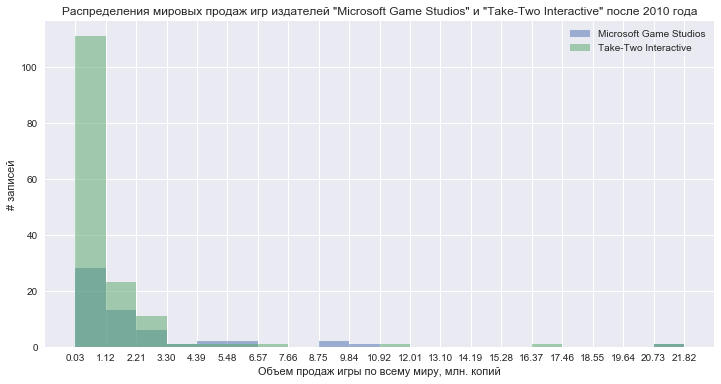

In [53]:
### YOUR CODE HERE ###
data0 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
data1 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']


fig, ax = plt.subplots(figsize = (12,6))

_,bins,_ = ax.hist(data0, label = 'Microsoft Game Studios', alpha = 0.5, bins = 20)
ax.hist(data1, label = 'Take-Two Interactive', alpha = 0.5, bins = bins)


ax.set_title('Распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года')
ax.set_xlabel('Объем продаж игры по всему миру, млн. копий')
ax.set_ylabel('# записей')
ax.set_xticks(bins)
ax.legend()


plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

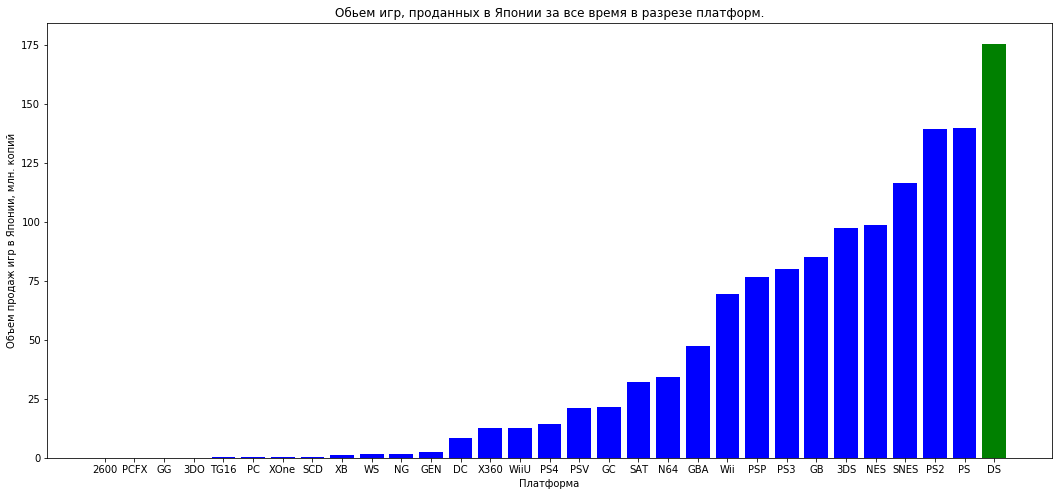

In [27]:
fig, ax = plt.subplots(figsize = (18,8))

data = df[['Platform', 'JP_Sales']].groupby('Platform').agg('sum')
dff = data.sort_values('JP_Sales')

colors = []
ax.bar(dff.index, dff['JP_Sales'])

hth = [] # получаем высоту каждого столбца и записываем в сисок
for i in ax.patches:
    hth.append(i.get_height())

for ich in hth: # заполняем список цветами в соотвествии с высотами столбцов
    if ich == np.min(hth):
        colors.append('Red')
        
    elif ich == np.max(hth):
        colors.append('Green')
        
    else:
        colors.append('Blue')

ax.bar(dff.index, dff['JP_Sales'], color = colors) # перерисовываем график

ax.set_title('Обьем игр, проданных в Японии за все время в разрезе платформ.')
ax.set_xlabel('Платформа')
ax.set_ylabel('Объем продаж игр в Японии, млн. копий')

plt.show()

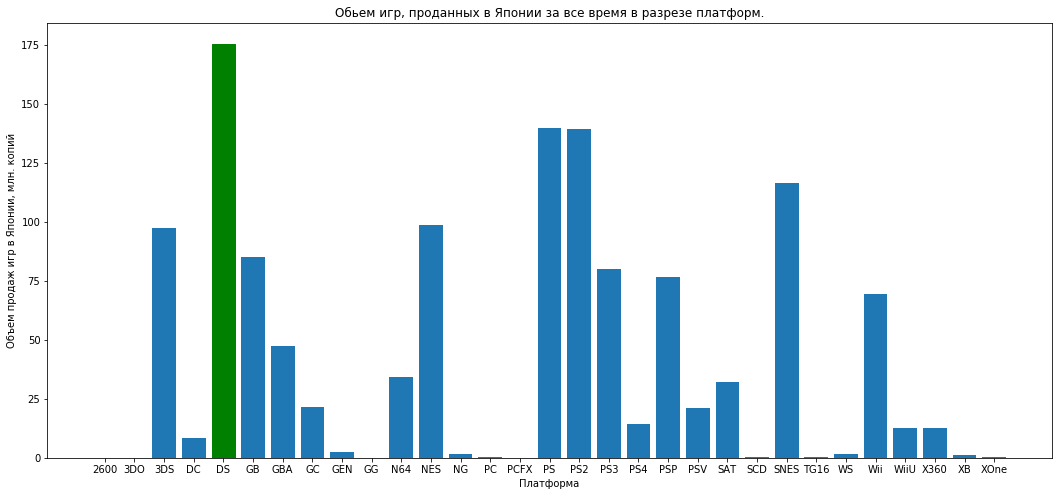

In [32]:
### Вариант с использованием  patches###

fig, ax = plt.subplots(figsize = (18,8))

data = df[['Platform', 'JP_Sales']].groupby('Platform').agg('sum')

ax.bar(data.index, data['JP_Sales'])

hth = [] # получаем высоту каждого столбца и записываем в сисок
for i in ax.patches:
    hth.append(i.get_height())

max_index = np.argmax(hth) # находим индекс максимального элемента в массиве
min_index = np.argmin(hth) # находим индекс минимального элемента в массиве

ax.patches[max_index].set_color('green')
ax.patches[min_index].set_color('red')

ax.set_title('Обьем игр, проданных в Японии за все время в разрезе платформ.')
ax.set_xlabel('Платформа')
ax.set_ylabel('Объем продаж игр в Японии, млн. копий')

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

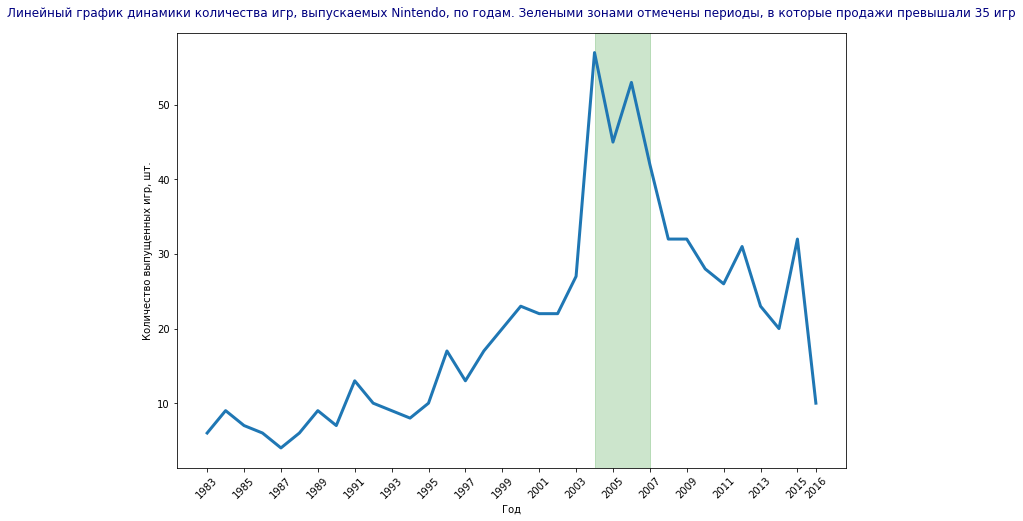

In [76]:
fig, ax = plt.subplots(figsize = (12,8)) #инициализация графика

dt = df[df['Publisher'] == 'Nintendo'][['Year','Name']].dropna().sort_values('Year') # Условие + удаляем NaN + сортируем
dt['Year'] = dt['Year'].apply(int) # Делаем года целочисленными
data_plot = dt.groupby('Year').count()

colorsstr = [] # сюда соберем начальные координаты для закрашивания зеленым
colorsend = [] # сюда соберем конечные координаты для закрашивания зеленым
hidhts = [] # сюда собираем все значения продаж
hidhtsstr = [] # сюда соберем только те значения продаж (hidhts[i - 1] < 35) & (hidhts[i] > 35) т.е. СТАРТ зеленой зоны
hidhtsend=[] # # сюда соберем только те значения продаж (hidhts[i] > 35) & (hidhts[i + 1] < 35) т.е. КОНЕЦ зеленой зоны
i = 0
j = 0
k = 0

for X in data_plot.index: # соберем массив со всеми значениями продаж
    hidhts.append(data_plot.loc[X, 'Name'])
    
while i <= len(hidhts)-2: # КОНЕЦ ОКРАСКИ
    if (hidhts[i] > 35) & (hidhts[i+1] < 35):
        hidhtsend.append(hidhts[i])
    i += 1
    
while j <= len(hidhts)-2: # СТАРТ ОКРАСКИ
    if (hidhts[j] < 35) & (hidhts[j+1] > 35):
        hidhtsstr.append(hidhts[j+1])
    j += 1

for X in data_plot.index: # ГОДА СТАРТ ОКРАСКИ по оси Х
    if data_plot.loc[X, 'Name'] in hidhtsstr:
        colorsstr.append(X)
        
for X in data_plot.index: # ГОДА КОНЕЦ ОКРАСКИ по оси Х
    if data_plot.loc[X, 'Name'] in hidhtsend:
        colorsend.append(X)

for X in colorsstr: # КРАСИМ
    ax.axvspan(xmin = X, xmax = colorsend[k], color = 'green', alpha = 0.2)
    k += 1
        
ax.plot(data_plot.index, data_plot['Name'], linewidth = 3) # САМ ГРАФИК

ax.set_title('Линейный график динамики количества игр, выпускаемых Nintendo, по годам. Зелеными зонами отмечены периоды, в которые продажи превышали 35 игр', pad = 16, color = "navy")
ax.set_xlabel('Год')
ax.set_ylabel('Количество выпущенных игр, шт.')
ax.set_xticks(list(range(data_plot.index.min(), data_plot.index.max(), 2)) + [data_plot.index.max()])
ax.tick_params(axis='x', rotation = 45)
#ax.grid(color = 'black', linestyle = '--', linewidth = 1) # для координатной сетки
plt.show() #выводит график на экран без дополнительной информации


### Постройте линейный график динамики продаж игр в мире, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год продовал больше 35 млн. копий, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

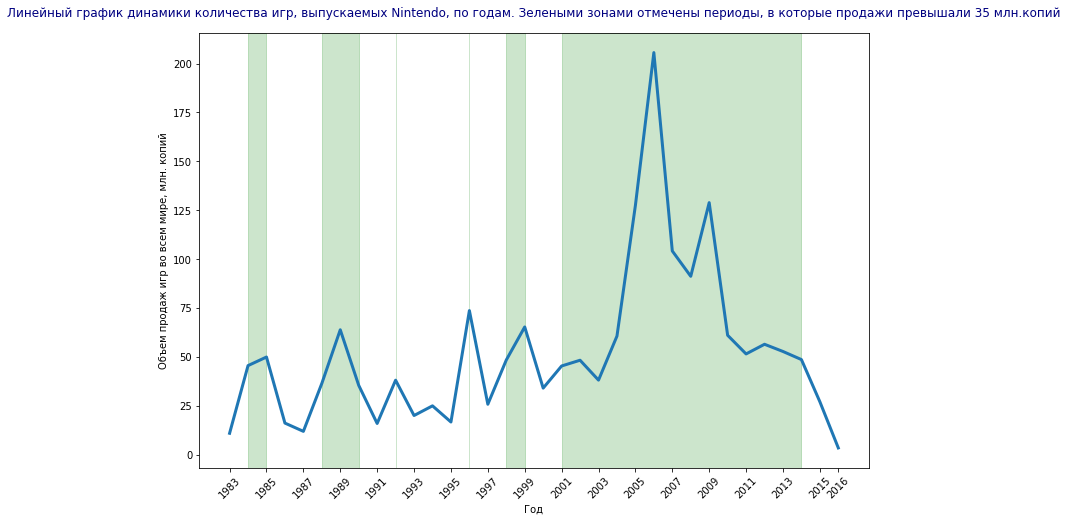

In [66]:
fig, ax = plt.subplots(figsize = (12,8)) #инициализация графика

data = df[df['Publisher'] == 'Nintendo'][['Year','Global_Sales']].dropna().sort_values('Year') # Условие + удаляем NaN + сортируем
data['Year'] = data['Year'].apply(int) # Делаем года целочисленными
data_plot = data.groupby('Year').agg('sum') # группируем по годам

colorsstr = [] # сюда соберем начальные координаты для закрашивания зеленым
colorsend = [] # сюда соберем конечные координаты для закрашивания зеленым
hidhts = [] # сюда собираем все значения продаж
hidhtsstr = [] # сюда соберем только те значения продаж (hidhts[i - 1] < 35) & (hidhts[i] > 35) т.е. СТАРТ зеленой зоны
hidhtsend=[] # # сюда соберем только те значения продаж (hidhts[i] > 35) & (hidhts[i + 1] < 35) т.е. КОНЕЦ зеленой зоны
i = 0
j = 0
k = 0

for X in data_plot.index: # соберем массив со всеми значениями продаж
    hidhts.append(data_plot.loc[X, 'Global_Sales'])
    
while i <= len(hidhts)-2: # КОНЕЦ ОКРАСКИ
    if (hidhts[i] > 35) & (hidhts[i+1] < 35):
        hidhtsend.append(hidhts[i])
    i += 1
    
while j <= len(hidhts)-2: # СТАРТ ОКРАСКИ
    if (hidhts[j] < 35) & (hidhts[j+1] > 35):
        hidhtsstr.append(hidhts[j+1])
    j += 1

for X in data_plot.index: # ГОДА СТАРТ ОКРАСКИ по оси Х
    if data_plot.loc[X, 'Global_Sales'] in hidhtsstr:
        colorsstr.append(X)
        
for X in data_plot.index: # ГОДА КОНЕЦ ОКРАСКИ по оси Х
    if data_plot.loc[X, 'Global_Sales'] in hidhtsend:
        colorsend.append(X)

for X in colorsstr: # КРАСИМ
    ax.axvspan(xmin = X, xmax = colorsend[k], color = 'green', alpha = 0.2)
    k += 1
        
ax.plot(data_plot.index, data_plot['Global_Sales'], linewidth = 3) # САМ ГРАФИК

ax.set_title('Линейный график динамики количества игр, выпускаемых Nintendo, по годам. Зелеными зонами отмечены периоды, в которые продажи превышали 35 млн.копий', pad = 16, color = "navy")
ax.set_xlabel('Год')
ax.set_ylabel('Объем продаж игр во всем мире, млн. копий')
ax.set_xticks(list(range(data_plot.index.min(), data_plot.index.max(), 2)) + [data_plot.index.max()])
ax.tick_params(axis='x', rotation = 45)
#ax.grid(color = 'black', linestyle = '--', linewidth = 1) # для координатной сетки
plt.show() #выводит график на экран без дополнительной информации


### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [4]:
data = df[['Rank', 'Genre', 'Publisher', 'NA_Sales', 'Global_Sales']]

data_genre = data.groupby(['Genre']).agg('sum') # Группируем по столбцу Жанр
data_genre = data_genre.sort_values('Global_Sales', ascending = False).head(3) # берем 3 последних

data_publish = data.groupby(['Publisher']).agg('sum') # Группируем по столбцу Издатель
data_publish = data_publish.sort_values('Global_Sales', ascending = False).head(4) # берем 4 последних


In [5]:
data_genre.reset_index()

,Genre,Rank,NA_Sales,Global_Sales
0,Action,26441383,877.83,1751.18
1,Sports,17419112,683.35,1330.93
2,Shooter,9653872,582.60,1037.37


In [6]:
data_publish.reset_index()

,Publisher,Rank,NA_Sales,Global_Sales
0,Nintendo,2714164,816.87,1786.56
1,Electronic Arts,7140412,595.07,1110.32
2,Activision,6368325,429.70,727.46
3,Sony Computer Entertainment,4105604,265.22,607.50


### В предыдущих двух строках мы определили 3 жанра и 4 производителя. Далее создадим датасет, из которого будем брать данные для построения точечного графика, использую названия производителей и выранные жанры.

In [32]:
dt_pub_gen = df[['Year','Genre', 'Publisher', 'NA_Sales', 'Global_Sales']]
dt_pub_gen = dt_pub_gen.groupby(['Publisher', 'Genre','Year']).agg('sum').reset_index().dropna().sort_values('Year') # Группируем по столбцу Издатель и Жанр
dt_pub_gen

,Publisher,Genre,Year,NA_Sales,Global_Sales
243,Activision,Action,1980.0,0.32,0.34
386,Activision,Sports,1980.0,0.46,0.49
631,Atari,Shooter,1980.0,6.56,7.07
579,Atari,Misc,1980.0,1.21,1.29
279,Activision,Fighting,1980.0,0.72,0.77
...,...,...,...,...,...
1364,Deep Silver,Fighting,2016.0,0.04,0.09
3552,Nintendo,Action,2016.0,1.00,3.05
2260,Idea Factory,Action,2017.0,0.00,0.01
4365,Sega,Role-Playing,2017.0,0.00,0.04


### Построим график зависимостей.

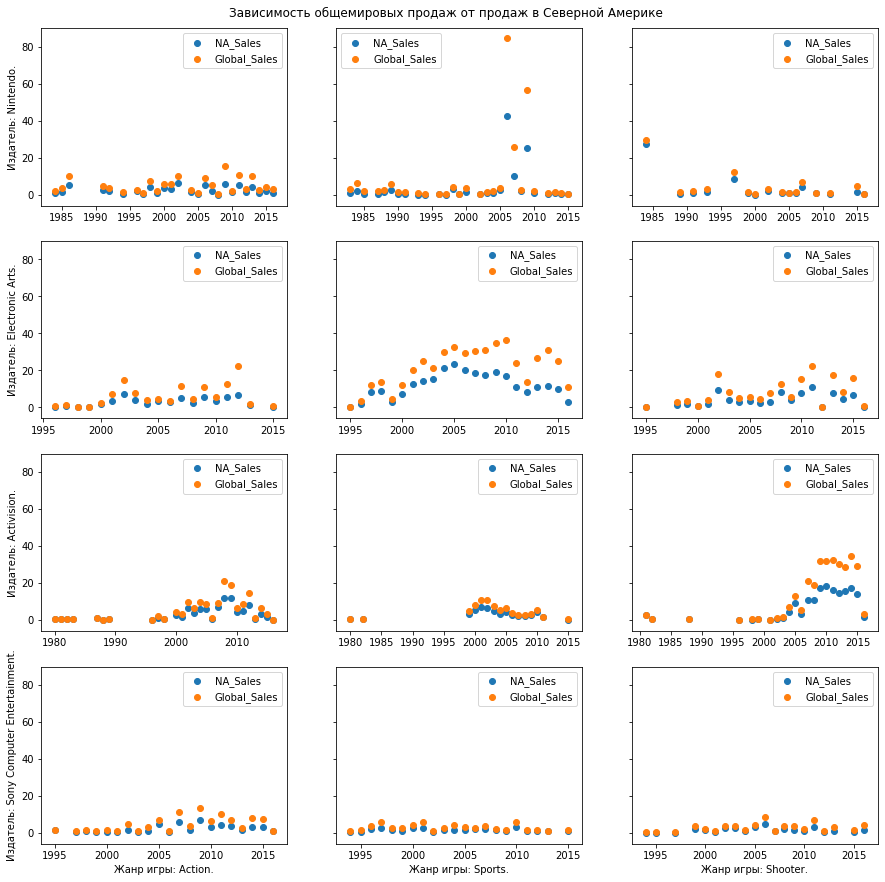

In [36]:
fig, axs = plt.subplots(nrows = 4, ncols = 3, sharey = True, figsize = (15,15)) # инициализируем график, сделаем общей ось У
#заведем два списка с издателми и жанрами  по которым мы будем итерировать
pablish = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment']
Numb_ganr = ['Action', 'Sports', 'Shooter']

for i , pab in enumerate(pablish):
    for j, is_ganr in enumerate(Numb_ganr):
        ax = axs[i][j]
        ax.scatter(dt_pub_gen[(dt_pub_gen['Publisher'] == pab) & (dt_pub_gen['Genre'] == is_ganr)]['Year'], dt_pub_gen[(dt_pub_gen['Publisher'] == pab) & (dt_pub_gen['Genre'] == is_ganr)]['NA_Sales'], label = 'NA_Sales')
        ax.scatter(dt_pub_gen[(dt_pub_gen['Publisher'] == pab) & (dt_pub_gen['Genre'] == is_ganr)]['Year'], dt_pub_gen[(dt_pub_gen['Publisher'] == pab) & (dt_pub_gen['Genre'] == is_ganr)]['Global_Sales'], label = 'Global_Sales')
        
        ax.legend()
        #подпишем столбцы
        if i == len(pablish) - 1:
            if j == 0:
                ganr = 'Action'
            
            elif j == 1:
                ganr = 'Sports'
                
            else:
                ganr = 'Shooter' 
            ax.set_xlabel('Жанр игры: ' + ganr + '.')
        #подпишем строки
        if j == 0:
            ax.set_ylabel('Издатель: ' + pab + '.')


fig.suptitle('Зависимость общемировых продаж от продаж в Северной Америке', y = 0.9)            
plt.show()